# Determinant Formulas and Cofactors

## 1) Definition

The **determinant** of a square matrix $A = [a_{ij}] \in \mathbb{R}^{n \times n}$ can be computed using **cofactor expansion** along any row $i$ or column $j$:

**Cofactor:** The cofactor of element $a_{ij}$ is:
$$
C_{ij} = (-1)^{i+j} \det(M_{ij})
$$
where $M_{ij}$ is the $(n-1) \times (n-1)$ **minor** obtained by deleting row $i$ and column $j$.

**Determinant Formula (row expansion):**
$$
\det(A) = \sum_{j=1}^n a_{ij} C_{ij}
$$

**Determinant Formula (column expansion):**
$$
\det(A) = \sum_{i=1}^n a_{ij} C_{ij}
$$


## 2) Derivation

1. **Minor:** For element $a_{ij}$, remove its row $i$ and column $j$ to form $M_{ij}$.
2. **Cofactor:** Multiply the determinant of the minor by $(-1)^{i+j}$:
$$
C_{ij} = (-1)^{i+j} \det(M_{ij})
$$
3. **Determinant Expansion:** For any row $i$:
$$
\det(A) = a_{i1}C_{i1} + a_{i2}C_{i2} + \dots + a_{in}C_{in} = \sum_{j=1}^{n} a_{ij} C_{ij}
$$
4. Similarly, column expansion gives:
$$
\det(A) = \sum_{i=1}^{n} a_{ij} C_{ij}
$$

**Example (3×3):**
$$
\det\begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}
= a \det\begin{bmatrix} e & f \\ h & i \end{bmatrix}
- b \det\begin{bmatrix} d & f \\ g & i \end{bmatrix}
+ c \det\begin{bmatrix} d & e \\ g & h \end{bmatrix}
$$


## 3) Computation Steps

**Step 1:** Identify the square matrix $A$.

**Step 2:** Choose a row or column for expansion (often the one with zeros to simplify).

**Step 3:** Compute minors $M_{ij}$ by deleting row $i$ and column $j$.

**Step 4:** Compute cofactors:
$$
C_{ij} = (-1)^{i+j} \det(M_{ij})
$$

**Step 5:** Compute determinant using:
$$
\det(A) = \sum_{j=1}^{n} a_{ij} C_{ij} \quad \text{(row expansion)}
$$
or
$$
\det(A) = \sum_{i=1}^{n} a_{ij} C_{ij} \quad \text{(column expansion)}
$$


In [1]:
import jax.numpy as jnp

# Function to compute determinant using cofactor expansion
def det_cofactor(A):
    n = A.shape[0]
    if n == 1:
        return A[0,0]
    elif n == 2:
        return A[0,0]*A[1,1] - A[0,1]*A[1,0]
    else:
        det = 0.0
        for j in range(n):
            minor = jnp.delete(jnp.delete(A, 0, axis=0), j, axis=1)  # remove row 0, column j
            cofactor = ((-1)**j) * det_cofactor(minor)
            det += A[0,j] * cofactor
        return det

# Example matrix
A = jnp.array([[2., 1., 3.],
               [1., 0., 4.],
               [0., 2., 5.]])

det_A = det_cofactor(A)
print("Matrix A:\n", A)
print("Determinant of A (cofactor expansion):", det_A)


Matrix A:
 [[2. 1. 3.]
 [1. 0. 4.]
 [0. 2. 5.]]
Determinant of A (cofactor expansion): -15.0


## 4) Plotting

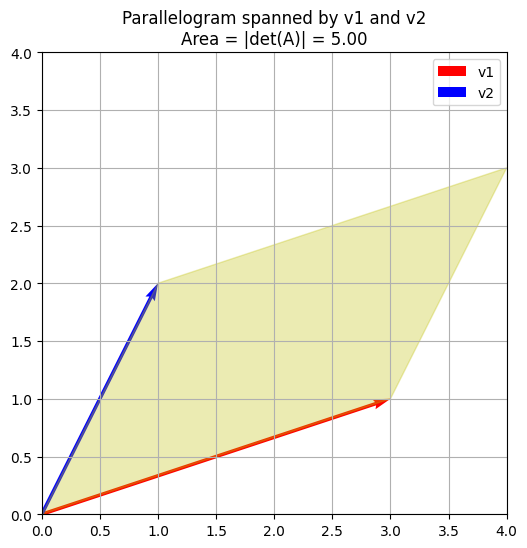

In [2]:
import matplotlib.pyplot as plt

# 2D vectors as columns of 2x2 matrix
v1 = jnp.array([3., 1.])
v2 = jnp.array([1., 2.])

# Original parallelogram
origin = jnp.zeros(2)
plt.figure(figsize=(6,6))
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(*origin, *v2, angles='xy', scale_units='xy', scale=1, color='b', label='v2')

# Fill parallelogram
plt.fill([0, v1[0], v1[0]+v2[0], v2[0]],
         [0, v1[1], v1[1]+v2[1], v2[1]], color='y', alpha=0.3)

# Compute determinant (area)
A2 = jnp.column_stack([v1, v2])
area = jnp.abs(jnp.linalg.det(A2))

plt.xlim(0,4)
plt.ylim(0,4)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title(f"Parallelogram spanned by v1 and v2\nArea = |det(A)| = {area:.2f}")
plt.show()


## 5) Use Cases of Determinants and Cofactors

1. **Invertibility:** $A$ is invertible iff $\det(A) \neq 0$.
2. **Adjoint and Inverse:** The inverse of $A$ can be computed using cofactors:
$$
A^{-1} = \frac{1}{\det(A)} \text{adj}(A)
$$
3. **Volume/Area Scaling:** Determinant gives the scaling factor for areas (2D) or volumes (3D).
4. **Cramer's Rule:** Solve $A \mathbf{x} = \mathbf{b}$ using cofactors:
$$
x_i = \frac{\det(A_i)}{\det(A)}
$$
5. **Eigenvalue Computation:** Determinants appear in characteristic polynomial:
$$
\det(A - \lambda I) = 0
$$
